# First assignment - Andreas Samberg

Imports and set magics:

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})

# # Installs
# ! pip install fredapi
# ! pip install git+https://github.com/alemartinello/dstapi

from dstapi import DstApi
from fredapi import Fred

from helpers import f # Acts up if letters are capitalized

# Read and clean data

Import your data, either through an API or manually, and load it. 

In [48]:
PRIS113 = DstApi('PRIS113')
PRIS113.tablesummary(language='en')


Table PRIS113: Consumer price index by type and time
Last update: 2025-10-10T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,TYPE,1,INDEKS,Consumer price index,INDEKS,Consumer price index,False
1,Tid,549,1980M01,1980M01,2025M09,2025M09,True


In [49]:


PRIS113.variable_levels('Tid',language='en')


,id,text
0,1980M01,1980M01
1,1980M02,1980M02
2,1980M03,1980M03
3,1980M04,1980M04
4,1980M05,1980M05
...,...,...
544,2025M05,2025M05
545,2025M06,2025M06
546,2025M07,2025M07
547,2025M08,2025M08


In [50]:
Y = pd.to_datetime(priser['TID'],format='%YM%m')

In [51]:
params = {
    'table': 'PRIS113',
    'format': 'BULK', # semicolon separated file
    'lang': 'en',
    'variables': [
        {'code': 'TYPE', 'values': ['*']},
        {'code': 'Tid', 'values': ['*']},
        ]
    }

# b. download
priser = PRIS113.get_data(params=params)


# c. display
display(priser.head())
display(priser.info())


,TYPE,TID,INDHOLD
0,Consumer price index,1980M01,33.0
1,Consumer price index,1980M05,34.5
2,Consumer price index,1980M09,35.5
3,Consumer price index,1981M01,36.5
4,Consumer price index,1981M05,38.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TYPE     549 non-null    object
 1   TID      549 non-null    object
 2   INDHOLD  549 non-null    object
dtypes: object(3)
memory usage: 13.0+ KB


None

# The consumer price index (CPI), Pt, indexed to 100 on average in 2020


In [52]:
# I transform 'INDHOLD' to numeric values

priser['INDHOLD'] = pd.to_numeric(priser['INDHOLD'], errors='coerce')

# I take the mean of CPI in 2020
cpi_2020 = priser.loc[priser['TID'].str.contains('2020M'), 'INDHOLD'].mean()

print("Gennemsnitligt CPI i 2020:", cpi_2020)



Gennemsnitligt CPI i 2020: 103.43333333333332


In [53]:
#New col with all the values for the CPI indexed to 100 in 2020
priser['CPI_indexed_2020'] = (priser['INDHOLD'] / cpi_2020) * 100                   
display(priser.head(50))

,TYPE,TID,INDHOLD,CPI_indexed_2020
0,Consumer price index,1980M01,33.0,31.904608
1,Consumer price index,1980M05,34.5,33.354818
2,Consumer price index,1980M09,35.5,34.321624
3,Consumer price index,1981M01,36.5,35.288431
4,Consumer price index,1981M05,38.6,37.318724
5,Consumer price index,1981M09,39.8,38.478891
6,Consumer price index,1982M01,41.0,39.639059
7,Consumer price index,1982M05,42.3,40.895907
8,Consumer price index,1982M09,43.7,42.249436
9,Consumer price index,1983M01,44.7,43.216242


# The month-to-month inflation rate

In [54]:
Y = pd.to_datetime(priser['TID'],format='%YM%m')

In [55]:
display(Y)

0     1980-01-01
1     1980-05-01
2     1980-09-01
3     1981-01-01
4     1981-05-01
         ...    
544   2018-12-01
545   2020-03-01
546   2022-05-01
547   2023-01-01
548   2023-12-01
Name: TID, Length: 549, dtype: datetime64[ns]

In [59]:
pct_change = priser['CPI_indexed_2020'].pct_change()*100
display(pct_change)

0            NaN
1       4.545455
2       2.898551
3       2.816901
4       5.753425
         ...    
544   -14.129521
545     1.175318
546     9.099710
547     3.283052
548     0.257732
Name: CPI_indexed_2020, Length: 549, dtype: float64

In [60]:
pct_change_12m = priser['CPI_indexed_2020'].pct_change(periods=12)*100
display(pct_change_12m)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
544   -15.199336
545     2.991027
546    10.707269
547    12.900097
548    13.081395
Name: CPI_indexed_2020, Length: 549, dtype: float64

# Plots

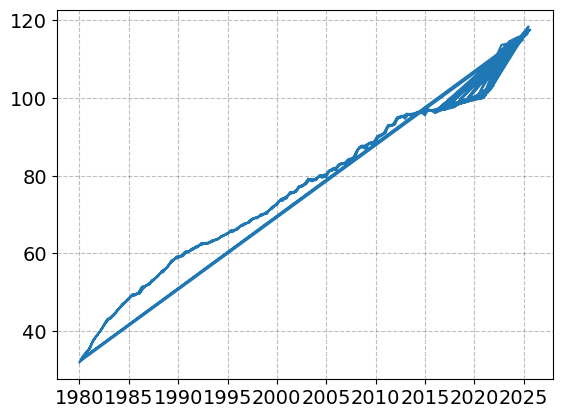

In [62]:
plt.plot(Y, priser['CPI_indexed_2020'], label='CPI indexed to 2020', color=colors[0])


Rækker i df (efter clean): 549
Datointerval: 1980-01-01 00:00:00 til 2025-09-01 00:00:00


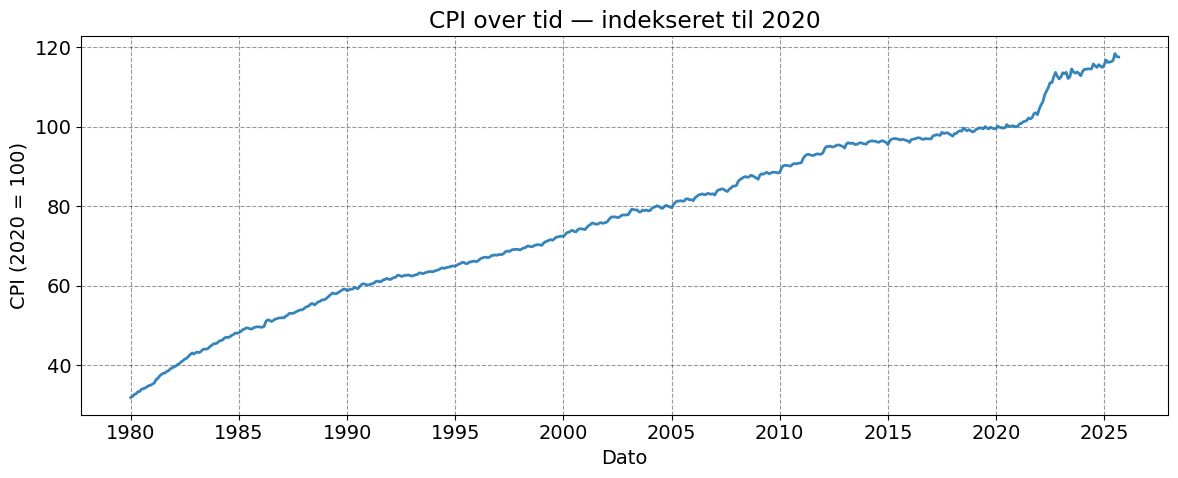

Eksempel - seneste månedlige inflation (%): date
2025-05-01    0.083126
2025-06-01    0.249169
2025-07-01    1.491301
2025-08-01   -0.653061
2025-09-01   -0.082169


In [63]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Robust parsing af 'TID' til månedlig datetime (første i måneden)
def tid_to_dt(s):
    s = str(s).strip()
    # Match år og måned uanset separator som 'M', '', '-', etc.
    m = re.match(r'(\d{4})\D*?(\d{1,2})', s)
    if m:
        y = int(m.group(1)); mo = int(m.group(2))
        try:
            return pd.Timestamp(year=y, month=mo, day=1)
        except Exception:
            return pd.NaT
    return pd.NaT

priser['date'] = priser['TID'].map(tid_to_dt)

# Drop rækker uden gyldig dato eller uden CPI-værdi
df = priser.dropna(subset=['date', 'CPI_indexed_2020']).copy()
df = df.sort_values('date').set_index('date')

# Hvis der stadig er få rækker, vis diagnostik
print('Rækker i df (efter clean):', len(df))
print('Datointerval:', df.index.min(), 'til', df.index.max())

# Plot pænt med gode ticks og formatering
plt.figure(figsize=(12,5))
ax = plt.gca()
ax.plot(df.index, df['CPI_indexed_2020'], lw=2, color=colors[0], alpha=0.9)
ax.set_xlabel('Dato')
ax.set_ylabel('CPI (2020 = 100)')
ax.set_title('CPI over tid — indekseret til 2020')
ax.grid(alpha=0.4)

# Bedre dato-ticks
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

# Optional: måned-til-måned inflation (%)
pct_change = df['CPI_indexed_2020'].pct_change()*100
print('Eksempel - seneste månedlige inflation (%):', pct_change.dropna().iloc[-5:].to_string())

# Conclusion

ADD CONCISE CONLUSION.